# Location Routing Problem (LRP)


LRP jointly considers the facility location problem (FLP) and the vehicle routing problem (VRP). Watson-Gandy and Dohrn (1973), Salhi, S., & Rand, G. K. (1989) have proven that the strategy for solving LRP by dismantling LRP into FLP and VRP and solving those problems sequentially is not optimal. Therefore, constructing the solving strategy that could consider FLP and VRP as a unity and solve them simultaneously to find the optimal solution is critical in processing LRP. Currently, the exact and heuristic algorithms are mainly applied to solve LRP. 

LRP is a traditional strategic-tactical-operational problem that considers a set of potential facilities and a set of customers. The main decisions of LRP are:  

* The number and location of facilities to open,  
* the allocation of customers to the opened facilities,  
* The design of routes to serve customers of each facility using a fleet of vehicles. 

As with most other models, one cannot capture all aspects of a real-life LRP with one mathematical model. Considering the complex real-life scenarios, LRP has a lot of variant problems with different objectives and constraints. Therefore, identifying the constraints of each sub-problem, such as facility location, allocation, and routing problem, is essential for solving LRP. 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem-Description" data-toc-modified-id="Problem-Description-1">Problem Description</a></span><ul class="toc-item"><li><span><a href="#Capacitied-facility-location-problem-with-set-up-cost" data-toc-modified-id="Capacitied-facility-location-problem-with-set-up-cost-1.1">Capacitied facility location problem with set-up cost</a></span></li><li><span><a href="#Integer-programming-model:" data-toc-modified-id="Integer-programming-model:-1.2">Integer programming model:</a></span></li><li><span><a href="#Capacitied-facility-location-problem-with-set-up-cost" data-toc-modified-id="Capacitied-facility-location-problem-with-set-up-cost-1.3">Capacitied facility location problem with set-up cost</a></span></li><li><span><a href="#Integer-programming-model:" data-toc-modified-id="Integer-programming-model:-1.4">Integer programming model:</a></span></li></ul></li><li><span><a href="#Setup" data-toc-modified-id="Setup-2">Setup</a></span></li><li><span><a href="#Example" data-toc-modified-id="Example-3">Example</a></span><ul class="toc-item"><li><span><a href="#Random-Data" data-toc-modified-id="Random-Data-3.1">Random Data</a></span></li><li><span><a href="#Road-Network-Data" data-toc-modified-id="Road-Network-Data-3.2">Road Network Data</a></span></li></ul></li></ul></div>

## Problem Description

### Capacitied facility location problem with set-up cost
Compared with the CFLP, this problem considers the establishment cost of facilities. It is assumed that there is a set of potential facilities with known capacity and a set of demand points with known demand. The transportation cost between each demand point and facility is calculatable as well. The problem aims to determine: 1. the number and location of facilities to open; 2. the allocation of customers to the opened facilities so as to **minimize the transportation and set-up cost.** 
The CFLP is constrained by the following conditions: 1. The demand of each customer must be satisfied; 2. The capacity of each facility must be satisfied; 3. Each demand point must be allocated to a single facility.

*Parameters*:
* $F$ is the set of all posible facility locations;
* $D$ is the set of all demand points;
* $C_{ij}$ is edge $i-j$ cost, with $i \in F, j \in D$;
* $o_{i}$ is the set-up cost of facility $i$, with $i \in F$;
* $g_{j}$ is the demand of the demand point $j$, with $j \in D$;
* $l_{i}$ is the lower capacity of the facility $i$, with $i \in F$;
* $u_{i}$ is the upper capacity of the facility $i$, with $i \in F$;

*Decision variables*:
$$
y_i= \begin{cases}1, & \text { Build facilities at point } i \\ 0, & \text { else }\end{cases}\\
x_{i j}= \begin{cases}1, & \text { Assign point } i \text { to point } j  \\ 0, & \text { else }\end{cases}
$$


###  Integer programming model:
\begin{array}{lll}
\min & \sum_{i \in F} o_{i}y_{i} + \sum_{i \in F}\sum_{j \in D} C_{ij} x_{ij}  & (1)\\
\text { s.t. } & l_{i}y_{i} \le \sum_{j \in D} x_{ij}g_{j} \le u_{i}y_{i}, \forall i \in F & (2)\\
&  \sum_{i \in F} x_{ij} = 1, \forall j \in D, &(3)\\
& y_{i} \in {0,1}， \forall i \in F  &(4)\\
& x_{ij} \in {0,1}， \forall i \in F,\forall j \in D .&(5)\\
\end{array}




Objective function (1) minimizes the facility set-up costs and demand point distribution costs.  
Equation (2) guarantees that each facility satisfied its lower demand to open and upper capacity to supply.  
Equation (3) guarantees that each demand point has been assigned to a single facility.  
        

### Capacitied facility location problem with set-up cost

*Parameters*:
* $F$ is the set of all posible facility locations;
* $D$ is the set of all demand points;
* $C_{ij}$ is edge $i-j$ cost, with $i \in F, j \in D$;
* $o_{i}$ is the set-up cost of facility $i$, with $i \in F$;
* $g_{j}$ is the demand of the demand point $j$, with $j \in D$;
* $l_{i}$ is the lower capacity of the facility $i$, with $i \in F$;
* $u_{i}$ is the upper capacity of the facility $i$, with $i \in F$;


###  Integer programming model:
\begin{array}{lll}
\min & \sum_{i \in F} o_{i}y_{i} + \sum_{i \in F}\sum_{j \in D} C_{ij} x_{ij}  \\
\text { s.t. } & l_{i}y_{i} \le \sum_{j \in D} x_{ij}g_{j} \le u_{i}y_{i}, \forall i \in F & \\
&  \sum_{i \in F} x_{ij} = 1, \forall j \in D, \\
& y_{i} \in {0,1}， \forall i \in F  \\
& x_{ij} \in {0,1}， \forall i \in F,\forall j \in D .
\end{array}




Objective function (1) minimizes the facility set-up costs and demand point distribution costs.  
Equation (2) guarantees that each facility satisfied its lower demand to open and upper capacity to supply.  
Equation (3) guarantees that each demand point has been assigned to a single facility.  
        

## Setup

In [1]:
from pulp import *
import random
from itertools import product
import numpy as np
import pandas as pd
import osmnx as ox

from location.LRPModel import *

In [2]:
np.random.seed(0)
# 求解器设置
solver_list = listSolvers(onlyAvailable=True)
print(solver_list)  # 可用求解器输出

No parameters matching '_test' found
['CPLEX_CMD', 'GUROBI', 'GUROBI_CMD', 'PULP_CBC_CMD']


## Example

### Random Data

In [3]:
random.seed(1)
num_fa = 10
num_de = 100
facility_nodes = [(random.random(), random.random()) for i in range(num_fa)]
fa_cap = [(random.randint(100, 200),  random.randint(200, 300)) for i in range(num_fa)]
demand_nodes = [(random.random(), random.random()) for i in range(num_de)]
de_demand = [random.randint(5, 15) for i in range(num_de)]
fa_cost = [random.randint(0, 1) for i in range(num_fa)]

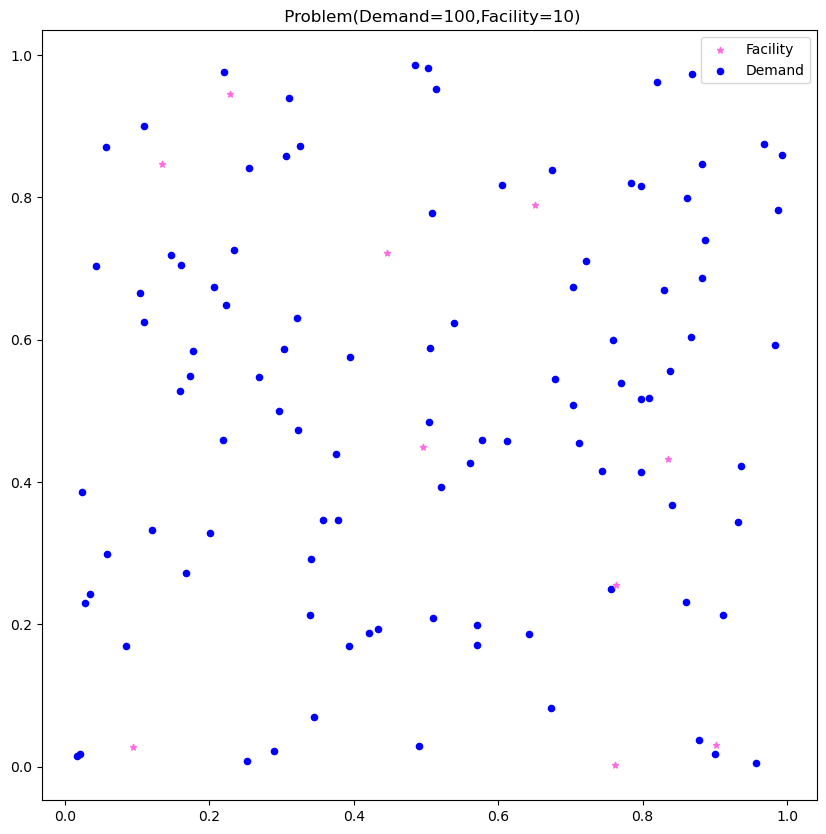

In [4]:
plt.figure(figsize=(10, 10))
plt.title(' Problem(Demand=' + str(len(demand_nodes)) + ',Facility=' + str(len(facility_nodes)) + ')')
plt.scatter(*zip(*facility_nodes), c='#ff69E1', marker='*', s=20, label='Facility')
plt.scatter(*zip(*demand_nodes), c='Blue', marker='o', s=20, label='Demand',zorder=0)
plt.grid(False)
plt.legend(loc='best', fontsize=10)
plt.show()

In [5]:
selected_facility, unselected_facility, assigned = LRP_cost(facility_nodes=facility_nodes,
              demand_nodes=demand_nodes,
              fa_cap=fa_cap,
              de_demand=de_demand,
              fa_cost=fa_cost,
              solver=PULP_CBC_CMD()).prob_solve()

Status: Optimal
Selected facilities = [1, 2, 3, 4, 8]
Unselected facilities = [0, 5, 6, 7, 9]
Assigned relationships =  [(1, 3), (1, 7), (1, 13), (1, 25), (1, 29), (1, 32), (1, 35), (1, 45), (1, 47), (1, 52), (1, 64), (1, 72), (1, 74), (1, 76), (1, 85), (1, 90), (1, 95), (1, 97), (2, 9), (2, 11), (2, 16), (2, 18), (2, 27), (2, 28), (2, 33), (2, 36), (2, 37), (2, 38), (2, 39), (2, 41), (2, 53), (2, 57), (2, 62), (2, 66), (2, 67), (2, 78), (2, 79), (2, 81), (2, 83), (2, 98), (3, 2), (3, 4), (3, 6), (3, 8), (3, 10), (3, 15), (3, 17), (3, 21), (3, 23), (3, 24), (3, 26), (3, 30), (3, 31), (3, 42), (3, 43), (3, 58), (3, 69), (3, 75), (3, 77), (3, 87), (3, 89), (3, 91), (3, 92), (3, 96), (3, 99), (4, 0), (4, 1), (4, 5), (4, 12), (4, 14), (4, 19), (4, 22), (4, 40), (4, 46), (4, 49), (4, 50), (4, 51), (4, 54), (4, 55), (4, 59), (4, 68), (4, 73), (4, 86), (4, 88), (4, 94), (8, 20), (8, 34), (8, 44), (8, 48), (8, 56), (8, 60), (8, 61), (8, 63), (8, 65), (8, 70), (8, 71), (8, 80), (8, 82), (8, 84)

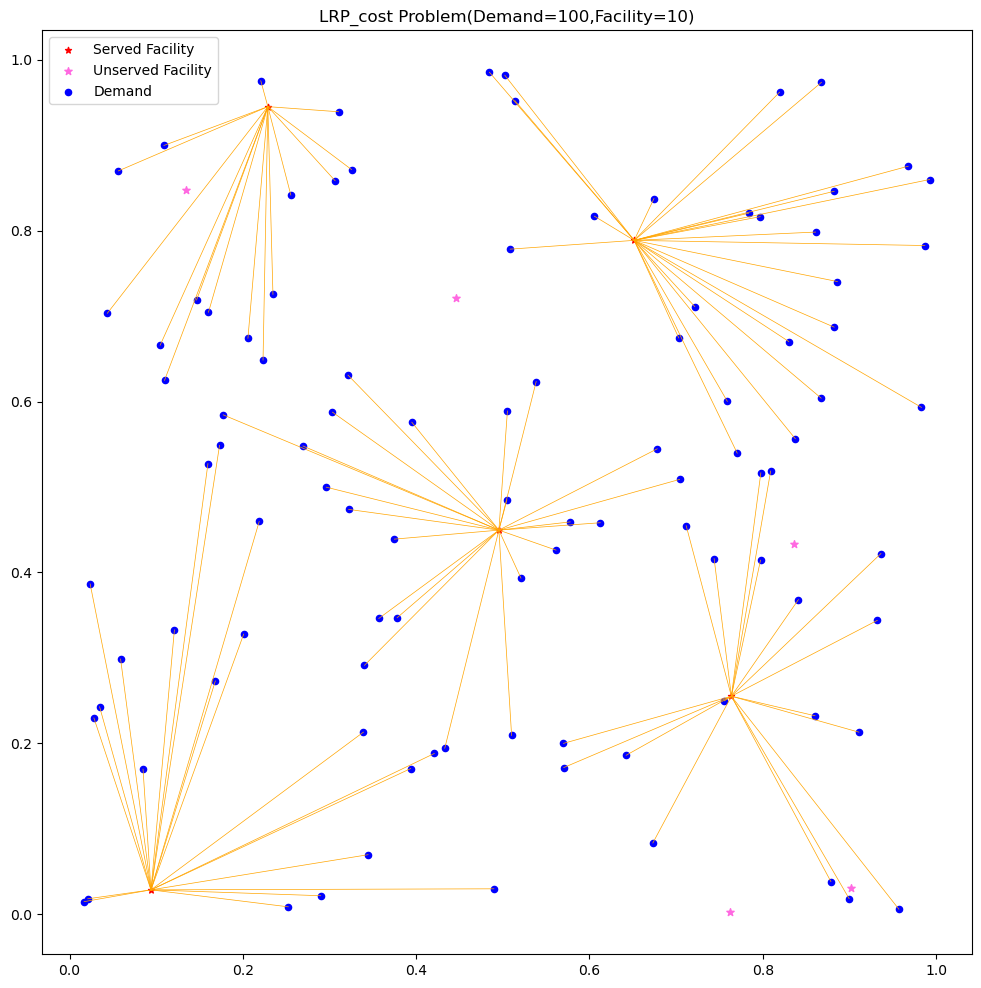

In [6]:
plt.figure(figsize=(12, 12))
plt.title('LRP_cost'+ ' Problem(Demand=' + str(len(demand_nodes)) + ',Facility=' + str(len(facility_nodes)) + ')')
plt.scatter(*zip(*selected_facility), c='Red', marker='*', s=20, label='Served Facility')
plt.scatter(*zip(*unselected_facility), c='#ff69E1', marker='*', s=30, label='Unserved Facility')
plt.scatter(*zip(*demand_nodes), c='Blue', marker='o', s=20, label='Demand')
for i in range(len(assigned)):
    pts = [facility_nodes[assigned[i][0]], demand_nodes[assigned[i][1]]]
    plt.plot(*zip(*pts), c='Orange', linewidth=0.5)
plt.grid(False)
plt.legend(loc='best', fontsize=10)
plt.show()

### Road Network Data

In [7]:
df = pd.read_csv('../data/北京POI裁剪.csv',encoding='gbk')
df = df.query('adname=="东城区" | adname=="西城区" | adname=="朝阳区" | adname=="海淀区"').reset_index(drop=True)
data = df[['long', 'lat']]
num_points = df.shape[0]
num_located = 10
np.random.seed(0)
num_people = np.random.randint(1,2, size=num_points)
cartesian_prod = list(product(range(num_points), range(num_points)))
points = [(data['long'][i], data['lat'][i]) for i in range(num_points)]
facility_index = [1, 7, 27, 28, 29, 42, 45, 84, 105, 108]
all_idex=list(range(108))
set1 = set(facility_index)
set2 = set(all_idex)
demand_index = list(set1^set2)
real_num_fa = len(facility_index)
real_num_de = len(demand_index)
real_facility_nodes =[]
real_demand_nodes =[]
for i in facility_index:
    real_facility_nodes.append(points[i])
for j in demand_index:
    real_demand_nodes.append(points[j])
real_fa_cap = [(random.randint(50, 100),  random.randint(150, 200)) for i in range(real_num_fa)]
real_de_demand = [random.randint(5, 15) for i in range(real_num_de)]
real_fa_cost = [random.randint(0, 1) for i in range(real_num_fa)]

In [8]:
G = ox.load_graphml('../data/Beijing.graphml')

In [9]:
real_selected_facility, real_unselected_facility, real_assigned = LRP_cost(facility_nodes=real_facility_nodes,
              demand_nodes=real_demand_nodes,
              fa_cap=real_fa_cap,
              de_demand=real_de_demand,
              fa_cost=real_fa_cost,
              solver=GUROBI_CMD()).prob_solve()

Status: Optimal
Selected facilities = [0, 1, 2, 3, 5, 6, 9]
Unselected facilities = [4, 7, 8]
Assigned relationships =  [(0, 2), (0, 3), (0, 11), (0, 13), (0, 14), (0, 19), (0, 31), (0, 33), (0, 42), (0, 68), (0, 69), (0, 84), (0, 87), (0, 90), (0, 91), (0, 94), (1, 34), (1, 48), (1, 52), (1, 61), (1, 62), (1, 64), (1, 77), (2, 26), (2, 46), (2, 71), (2, 74), (2, 75), (2, 81), (2, 85), (2, 88), (3, 0), (3, 4), (3, 5), (3, 6), (3, 15), (3, 18), (3, 22), (3, 24), (3, 25), (3, 28), (3, 29), (3, 37), (3, 65), (3, 70), (3, 72), (3, 86), (3, 89), (3, 92), (3, 95), (3, 97), (5, 30), (5, 32), (5, 35), (5, 36), (5, 41), (5, 45), (5, 47), (5, 50), (5, 54), (5, 63), (5, 66), (5, 67), (5, 78), (5, 79), (5, 83), (6, 7), (6, 10), (6, 12), (6, 16), (6, 17), (6, 21), (6, 23), (6, 38), (6, 43), (6, 49), (6, 51), (6, 55), (6, 56), (6, 57), (6, 60), (6, 80), (9, 1), (9, 8), (9, 9), (9, 20), (9, 27), (9, 39), (9, 40), (9, 44), (9, 53), (9, 58), (9, 59), (9, 73), (9, 76), (9, 82), (9, 93), (9, 96), (9, 98)

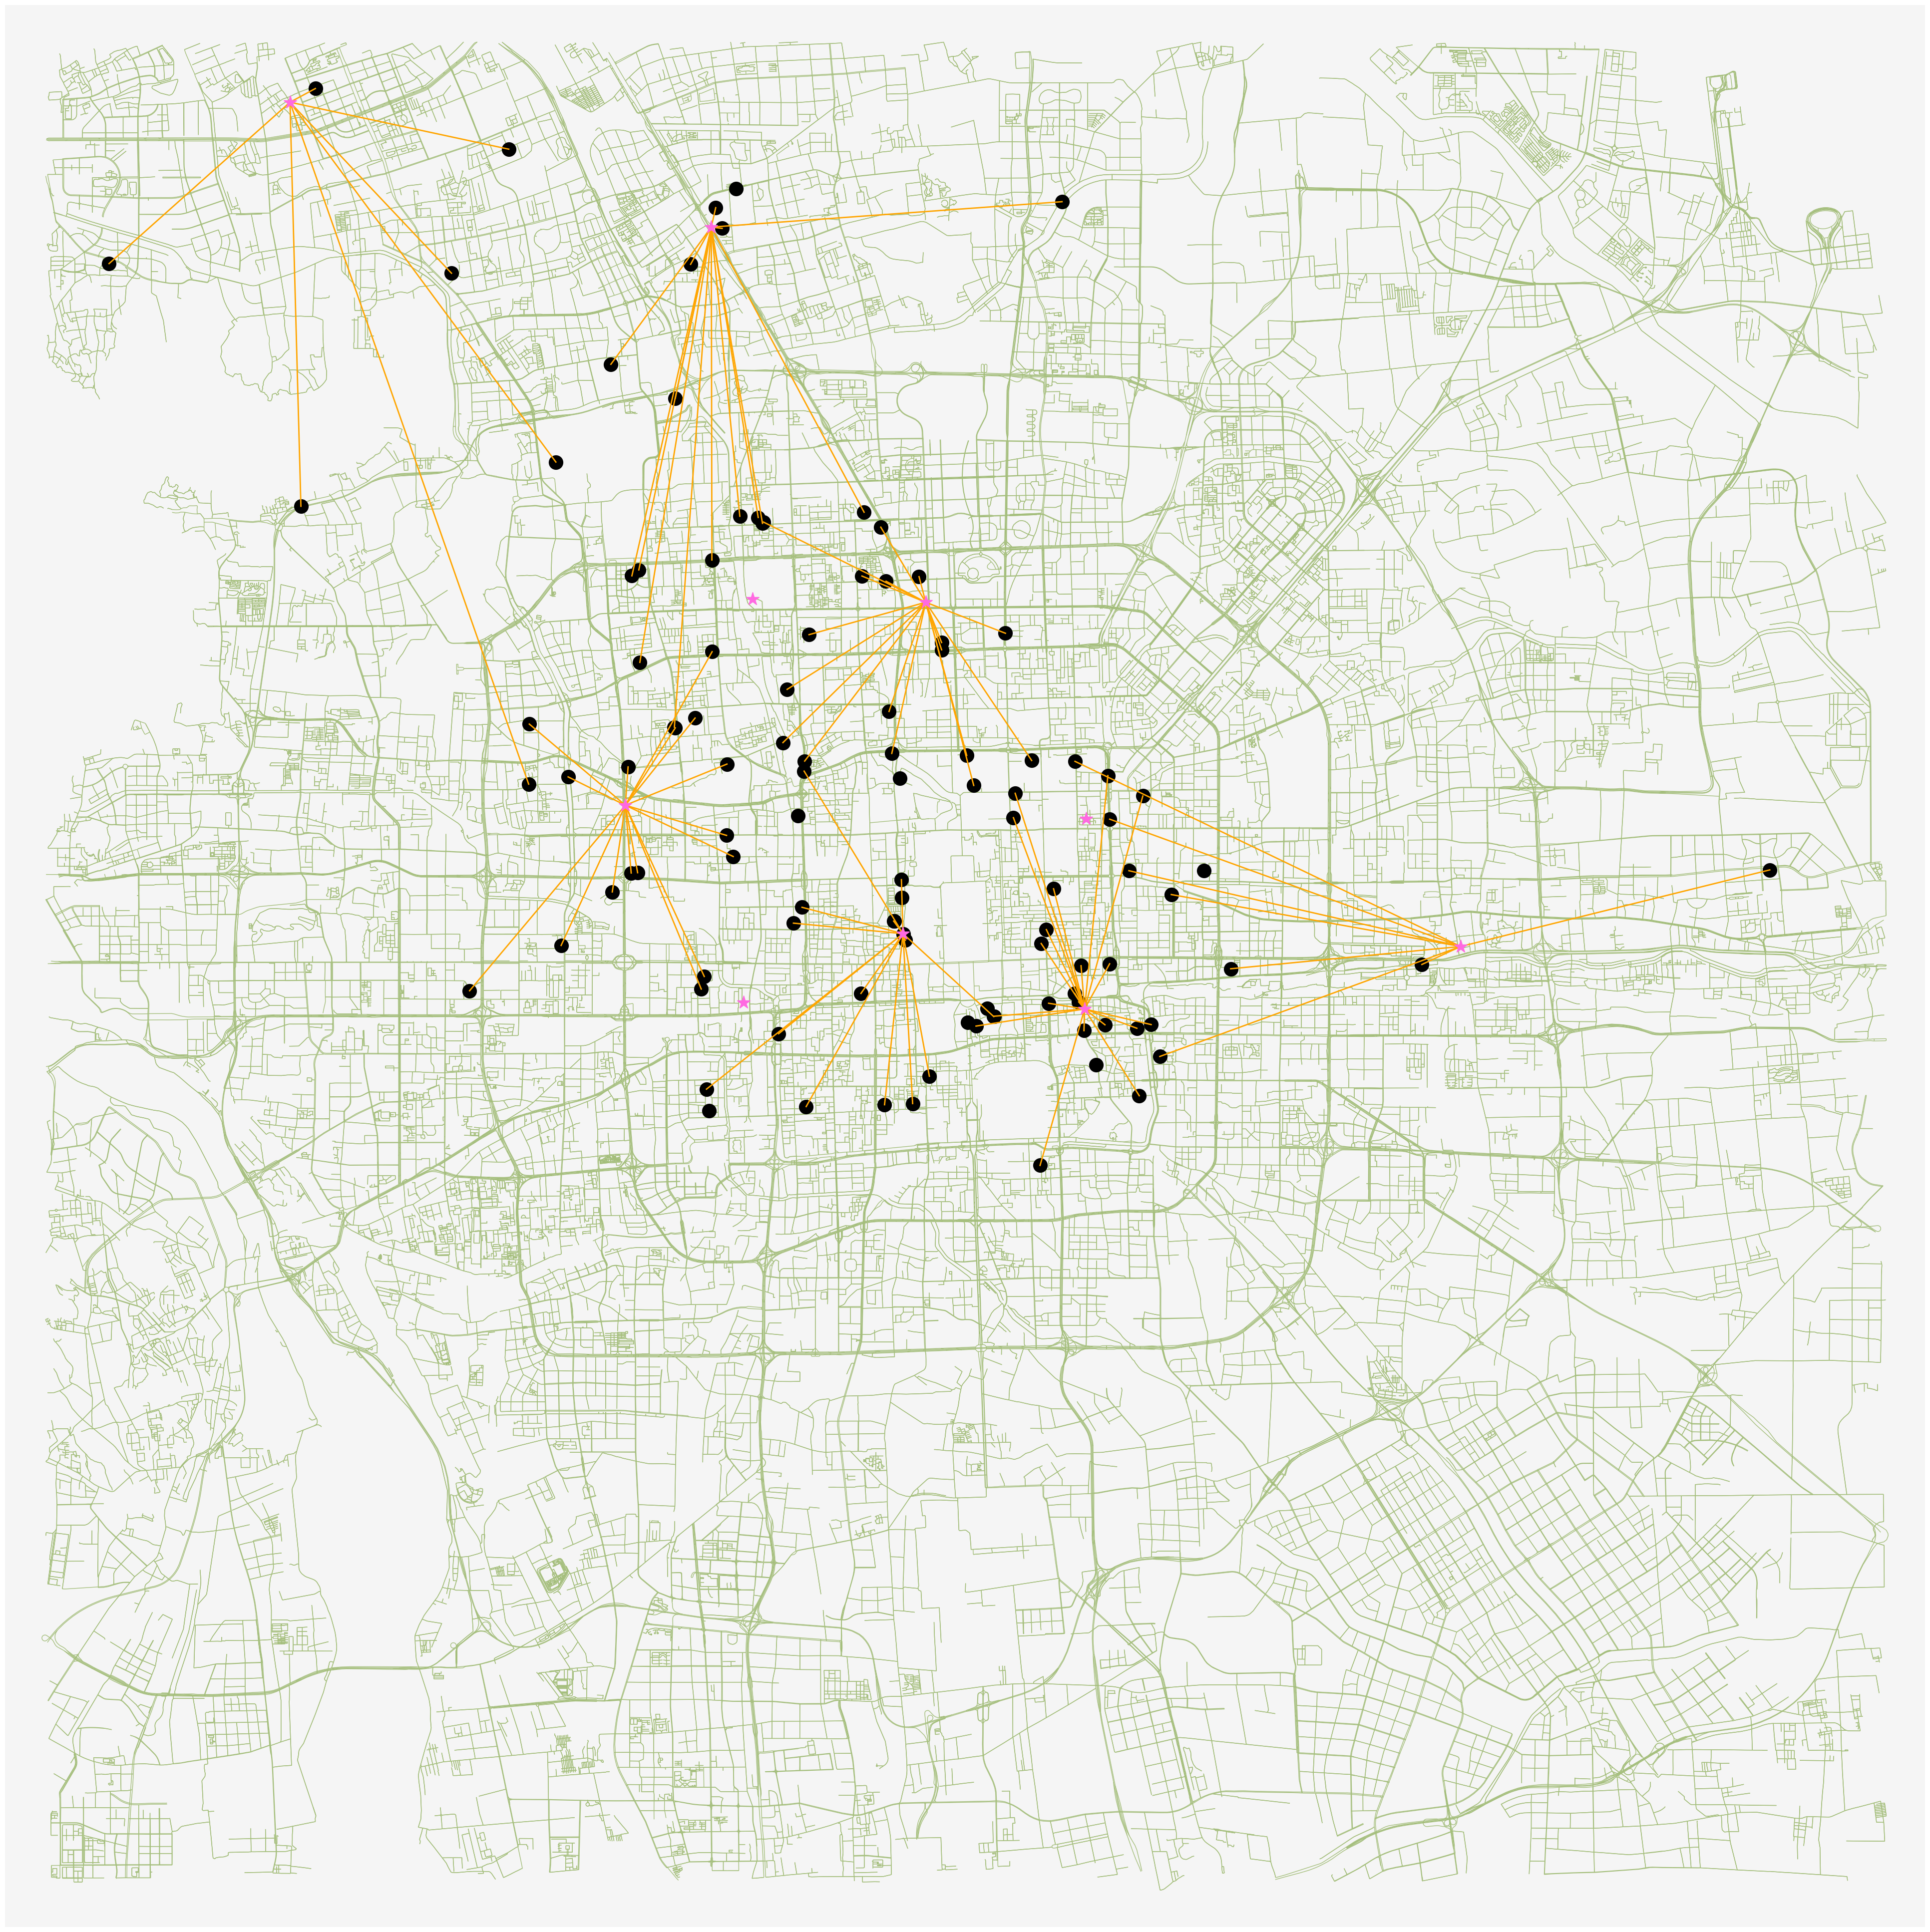

In [10]:
ox.plot_graph(G, figsize=(50,50),bgcolor="#F5F5F5",node_size=0,edge_color = "#A4BE7B", show=False, close=False)
for j in range(num_points):
    if j in facility_index:
        if j in real_selected_facility:
            lx = df['lat'][j]
            ly = df['long'][j]
            plt.plot(ly, lx, c='red', marker='*', markersize=20,zorder=3)
        else:
            lx = df['lat'][j]
            ly = df['long'][j]
            plt.plot(ly, lx, c='#ff69E1', marker='*', markersize=20,zorder=2)
    else:
        lx = df['lat'][j]
        ly = df['long'][j]
        plt.plot(ly, lx, c="black",marker='o',markersize=20, zorder=1)
#Lines
for i in range(len(real_assigned)):
    pts = [real_facility_nodes[real_assigned[i][0]], real_demand_nodes[real_assigned[i][1]]]
    plt.plot(*zip(*pts), c='Orange', linewidth=2, zorder=1)
plt.show()